In [4]:
%%capture
%pip install seaborn

In [9]:
import re
import sys
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

class Chain():
    def __init__(self, length, words) -> None:
        self.length = length
        self.words = words
        self.size = len(words)

class DictGraph():
    def __init__(self, length, nodes, connected, biggest) -> None:
        self.length = length
        self.nodes = nodes
        self.connected = connected
        self.biggest = biggest

In [10]:
chains = []
with open("longest.txt") as f:
    lines = f.readlines()
    for idx, line in enumerate(lines):
        if line.startswith("Longest"):
            length = int(re.search(r"\d+", line)[0])
            chain = Chain(length, lines[idx+2].strip().split(" -> "))
            chains.append(chain)
stats = []
with open("graph.txt") as f:
    lines = f.readlines()
    for idx in range(len(lines) - 3):
        if lines[idx].startswith("Graph"):
            length = int(re.search(r"\d+", lines[idx])[0])
            nodes = int(lines[idx+1].split(": ")[1])
            connected = int(lines[idx+2].split(": ")[1])
            biggest = int(lines[idx+3].split(": ")[1])
            graph = DictGraph(length, nodes, connected, biggest)
            stats.append(graph)


In [11]:
df = pd.DataFrame([{"length": chain.length, "words": chain.words, "size": chain.size} for chain in chains])
stats_df = pd.DataFrame([{"length": graph.length, "nodes": graph.nodes, "connected": graph.connected, "biggest": graph.biggest} for graph in stats])

Text(0.5, 1.0, 'Longest word chains')

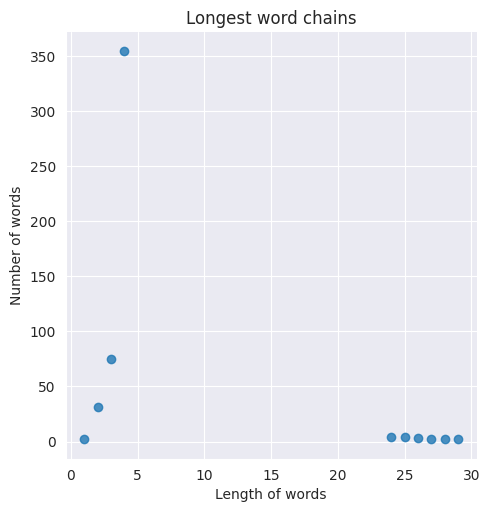

In [12]:
sns.lmplot(x="length", y="size", data=df, fit_reg=False)
plt.xlabel("Length of words")
plt.ylabel("Number of words")
plt.title("Longest word chains")

Text(0.5, 1.0, 'Size of biggest component in dictionary graph')

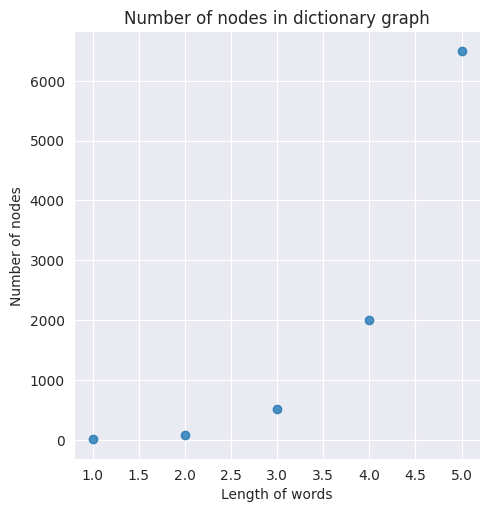

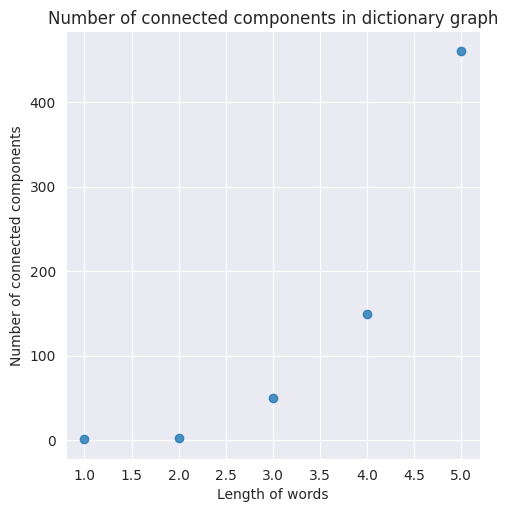

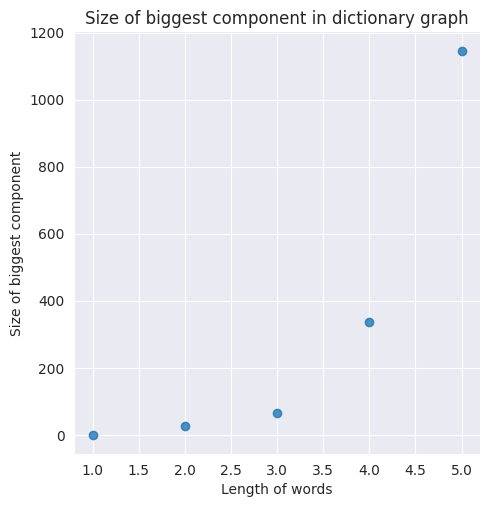

In [13]:
sns.lmplot(x="length", y="nodes", data=stats_df, fit_reg=False)
plt.xlabel("Length of words")
plt.ylabel("Number of nodes")
plt.title("Number of nodes in dictionary graph")
sns.lmplot(x="length", y="connected", data=stats_df, fit_reg=False)
plt.xlabel("Length of words")
plt.ylabel("Number of connected components")
plt.title("Number of connected components in dictionary graph")
sns.lmplot(x="length", y="biggest", data=stats_df, fit_reg=False)
plt.xlabel("Length of words")
plt.ylabel("Size of biggest component")
plt.title("Size of biggest component in dictionary graph")